# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who: Global leaders and policy makers who can make a real impact.

What: Understand how climate change is impacting countries around the world though environmental impacts such as temperature change, sea level rise, and extreme weather, and using emissions data to assess responsibility.

How: Illustrate that climate change is having a measurable impact and that policy can be an effective tool to lower emissions with the goal of convincing leaders to take action. 

# 3. Homework - work with your own data

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [15]:
#read in climate change data 
df = pd.read_csv('climate_change_dataset.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


There are no null values. Country is a string but the rest of the columns are numeric. The columns all have 1000 non-null values.

<Axes: xlabel='Country'>

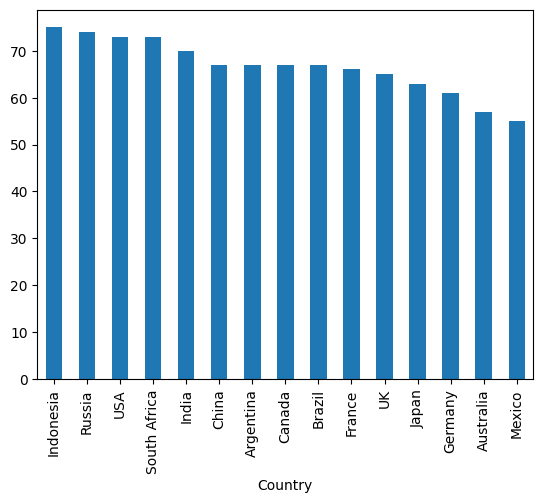

In [17]:
df['Country'].value_counts().plot(kind='bar')

There are some class imbalances in that some countries have more rows of data. Indoensia has the most. 

In [18]:
for col in df.columns: 
    print(f"Column: {col}", "Duplicates? ", df[col].duplicated().any())

Column: Year Duplicates?  True
Column: Country Duplicates?  True
Column: Avg Temperature (°C) Duplicates?  True
Column: CO2 Emissions (Tons/Capita) Duplicates?  True
Column: Sea Level Rise (mm) Duplicates?  True
Column: Rainfall (mm) Duplicates?  True
Column: Population Duplicates?  False
Column: Renewable Energy (%) Duplicates?  True
Column: Extreme Weather Events Duplicates?  True
Column: Forest Area (%) Duplicates?  True


Population is the only column with duplicates. Because population is a float number this makes sense because it is unlikely that two countries would have the me exact population. 

In [19]:
len(df)

1000

There are 1000 rows.

In [20]:
#looking at the mean, standard deviation, min, max of each numerical column: 
df.describe()

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


This data is clearly usable because the data passes a common sense gut check. There are no negative values for any of the columns and the columns that are percentages are all between 0 and 100 which makes sense. The values also make sense in terms of the units. For example a maximum of 5 mm of sea rise makes sense. If I saw 5 or 6 meters that would be clearly wrong. Similarly the temperature ranges in Celcius are reasonable. 

In [21]:
#looking at the first five rows
df.head(5)

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [ ]:
#plot histograms of all the columns
_ = df.hist(figsize=[12, 8 ])

I need to modify the data by encoding the country column which is a categorical variable. 

In [ ]:
#encode countries categorial variable
countries_encoded = pd.get_dummies(df.Country).astype(int)

df = df.join(countries_encoded).drop(columns = 'Country')

In [ ]:
#check for duplicates
df.duplicated().any()

np.False_

There are not duplicate rows.

In [ ]:
#show correlation matrix
df.corr()

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),Argentina,...,France,Germany,India,Indonesia,Japan,Mexico,Russia,South Africa,UK,USA
Year,1.000000,0.020954,0.041018,0.035433,-0.013638,0.071744,0.023826,-0.021620,-0.041327,0.012349,...,0.034668,-0.024187,-0.019883,-0.054423,0.054611,0.016112,-0.023512,-0.001903,-0.029573,0.028232
Avg Temperature (°C),0.020954,1.000000,0.012323,0.059005,-0.004532,0.003550,-0.065472,0.034951,-0.017027,-0.018347,...,-0.015559,0.012102,-0.003818,-0.032162,0.017336,0.022978,0.027672,0.028108,-0.042994,-0.027402
CO2 Emissions (Tons/Capita),0.041018,0.012323,1.000000,-0.038815,0.013306,0.011529,-0.023355,-0.004019,0.031387,0.001049,...,0.025620,-0.024774,0.013126,0.030218,0.024698,-0.046365,-0.073457,-0.040404,0.104537,0.022822
Sea Level Rise (mm),0.035433,0.059005,-0.038815,1.000000,0.022104,-0.000277,0.003655,0.025003,-0.028670,0.037209,...,0.042778,-0.030952,-0.025907,-0.063702,0.015074,-0.067501,0.068664,-0.029198,-0.011771,-0.020473
Rainfall (mm),-0.013638,-0.004532,0.013306,0.022104,1.000000,0.009254,-0.005641,-0.006967,0.018571,-0.009234,...,0.010963,0.000976,-0.046986,0.027887,0.022182,0.023535,-0.019452,-0.015724,-0.077453,-0.001668
Population,0.071744,0.003550,0.011529,-0.000277,0.009254,1.000000,0.001785,0.005175,-0.011638,0.030808,...,0.001419,0.031853,-0.032693,0.007526,-0.005306,0.019403,0.002248,0.001096,0.022381,0.024234
Renewable Energy (%),0.023826,-0.065472,-0.023355,0.003655,-0.005641,0.001785,1.000000,0.000172,-0.021138,-0.000812,...,0.029504,0.027772,0.008333,-0.016938,0.005197,0.004152,0.026480,-0.073280,0.012599,-0.034318
Extreme Weather Events,-0.021620,0.034951,-0.004019,0.025003,-0.006967,0.005175,0.000172,1.000000,-0.009291,-0.042976,...,0.079993,-0.026231,0.019178,0.015610,0.033209,-0.046642,0.012501,-0.019343,0.029442,-0.008038
Forest Area (%),-0.041327,-0.017027,0.031387,-0.028670,0.018571,-0.011638,-0.021138,-0.009291,1.000000,-0.026800,...,-0.016433,0.029699,-0.024958,-0.000786,-0.036551,0.038904,-0.033528,0.008078,0.032544,-0.032883
Argentina,0.012349,-0.018347,0.001049,0.037209,-0.009234,0.030808,-0.000812,-0.042976,-0.026800,1.000000,...,-0.071235,-0.068301,-0.073520,-0.076306,-0.069486,-0.064649,-0.075754,-0.075200,-0.070656,-0.075200


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [ ]:
before = np.array([11,5,40,25,19])
after = np.array([13,6,14,30,38])


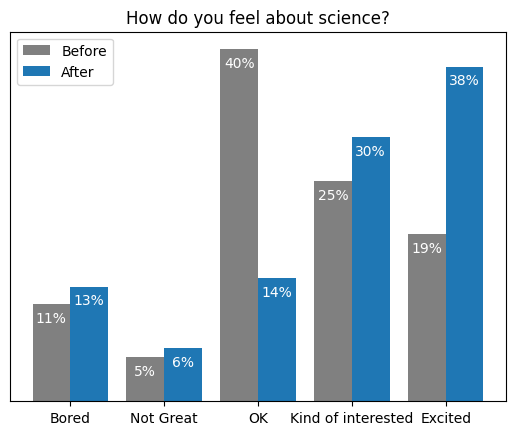

In [ ]:
fig, ax = plt.subplots()
responses = ["Bored", "Not Great", 'OK', "Kind of interested", 'Excited']
locations = np.arange(1, 6)
ax.set_xticks(locations, responses)
width = .4
before_bar = ax.bar(locations - .20, before, width, color = 'grey', label = 'Before')
after_bar = ax.bar(locations + .20, after, width, label = 'After')
ax.bar_label(before_bar, label_type='edge', padding= -15, color = 'white', fmt='%.0f%%')
ax.bar_label(after_bar, label_type='edge', padding= -15, color = 'white', fmt='%.0f%%')
ax.set_title("How do you feel about science?")
ax.legend()
ax.yaxis.set_visible(False)